# Librería

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint, RK45
import sympy as sp
from sympy.plotting import plot
from scipy.special import ellipk

# Ecuaciones Diferenciales

---
### Profesor: Juan Marcos Marín
### Profesor: Daniel Ruiz
### Nombre: Soleil Dayana Niño Murcia 1033097666
###         Juan José Usuga Giraldo 1020482080
*Métodos computacionales 2024-II*

---

# 1
El número de átomos radiactivos que decaen en un período de tiempo dado es proporcional al número de átomos en la muestra:

$$
\frac{dN}{dt} = -\lambda N
$$

con $\lambda=\frac{\ln{2}}{t_{1/2}}$ siendo $t_{1/2}$ el tiempo de vida media.

Escriba un programa que utilice el método de Euler para graficar $N(t)$. Compare con la solución exacta, $N(t) = N_0 e^{-\lambda t}$, para comparación. Tome $N_0=1000$ y $t_{1/2}=15$ horas, lo cual es el valor para el $^{24}Na$.

In [251]:
lambda_ = lambda t_1_2: np.log(2) / t_1_2

dndt = lambda t, N: -lambda_ * N

N0, t_1_2 = 1000, 15 # Número de átomos radiactivos y tiempo de vida media (horas)

lambda_(t_1_2)

np.float64(0.046209812037329684)

In [252]:
# Metodo Euler

def euler_method(f, x0, y0, h, x_end):
  """
  Implementación del método de Euler
  f: función que define la EDO dy/dx = f(x,y)
  x0, y0: condición inicial
  h: tamaño del paso
  x_end: valor final de x
  """
  # Calcular el número de pasos
  n_steps = int((x_end - x0) / h)

  # Inicializar arreglos
  x = np.zeros(n_steps + 1)
  y = np.zeros(n_steps + 1)

  # Establecer condición inicial
  x[0] = x0
  y[0] = y0

  # Iterar aplicando el método de Euler
  for i in range(n_steps):
      x[i+1] = x[i] + h
      y[i+1] = y[i] + h * f(x[i], y[i])

  return x, y

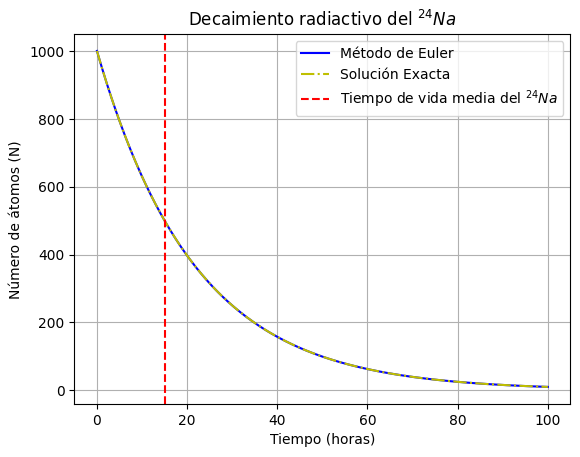

In [253]:
# Parámetros para el método de Euler
t0 = 0
tf = 100
h = 0.01

# Calcular la solución numérica con el método de Euler
t_euler, N_euler = euler_method(lambda t, N: -lambda_(t_1_2) * N, t0, N0, h, tf)

# Calcular la solución exacta
t_exacto = np.linspace(t0, tf, 500)
N_exacto = N0 * np.exp(-lambda_(t_1_2) * t_exacto)

# Graficar los resultados
plt.plot(t_euler, N_euler, 'b', label='Método de Euler')
plt.plot(t_exacto, N_exacto, 'y', linestyle = '-.', label='Solución Exacta')

plt.axvline(x= t_1_2, color='r', linestyle='--', label='Tiempo de vida media del $^{24}Na$')

plt.xlabel('Tiempo (horas)')
plt.ylabel('Número de átomos (N)')
plt.title('Decaimiento radiactivo del $^{24}Na$')
plt.legend()
plt.grid(True)

In [254]:
print(N_exacto.mean(), N_euler.mean())

error = np.abs(N_exacto.mean() - N_euler.mean())
print(error)

214.85698324713442 214.2559916112934
0.6009916358410123


# 2
El péndulo de la figura está suspendido de un collar deslizante. El sistema está en reposo cuando se le impone un movimiento oscilante $y(t)=Y \sin{\omega t}$ sobre la cuenta, comenzando en $t=0$. La ecuación diferencial que describe el movimiento del péndulo es


Grafique $\theta$ vs $t$ con $0\leq t \leq 10s$ y determine el $\theta$ mayor en este intervalo. Use $g=9.8 \ m/s^2$, $L=1.0 \ m$, $Y=0.25 \ m$ y $\omega=2.5 \ rad/s$. Con $\theta(0)=0$ y $\dot{\theta}(0)=0.1 \ rad/s$.


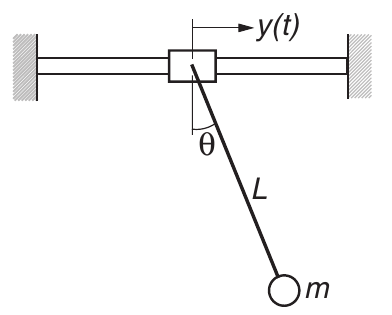

In [255]:
g, L, Y = 9.8, 1, 0.25
omega = 2.5  # rad/s
theta0 = 0  # rad
t_punto0 = 0.1  # rad/s

y = lambda t : Y* np.sin(omega*t)

In [256]:
# Condiciones iniciales
t0, tf = 0, 10
u0 = (0, 0.1)

In [257]:
sol = solve_ivp(pendulo_con_base, [t0, tf], u0, t_eval=np.linspace(t0, tf, 1000))

In [258]:
# Ecuación diferencial del péndulo con base oscilante
def pendulo_con_base(t, y):
    theta, t_punto = y
    forcing = -(Y * omega**2 / L) * np.sin(omega * t) * np.cos(theta)
    t_doblepunto = -(g / L) * np.sin(theta) + forcing
    return [t_punto, t_doblepunto]

# Intervalo de tiempo y condiciones iniciales
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)
y0 = [theta0, t_punto0]

# Resolver la ecuación diferencial
sol = solve_ivp(pendulo_con_base, t_span, y0, t_eval=t_eval)

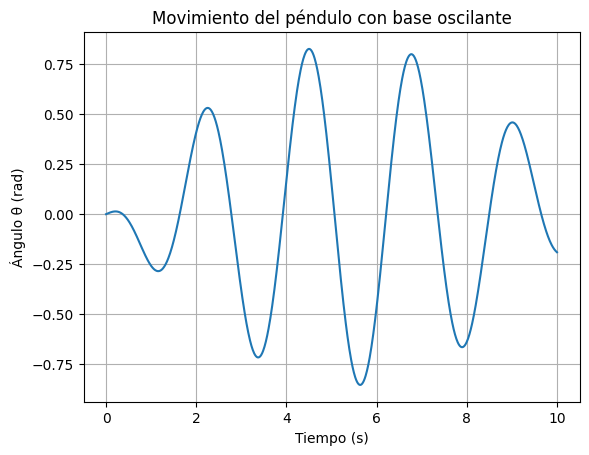

In [259]:
plt.plot(sol.t, sol.y[0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo θ (rad)')
plt.title('Movimiento del péndulo con base oscilante')
plt.grid(True)
plt.show()

In [260]:
theta_max = np.max(sol.y[0])
print(f"El ángulo theta máximo es: {theta_max:.4f} rad")

El ángulo theta máximo es: 0.8258 rad


# 3
El circuito eléctrico de la figura cuenta con una resistencia y un capacitor:

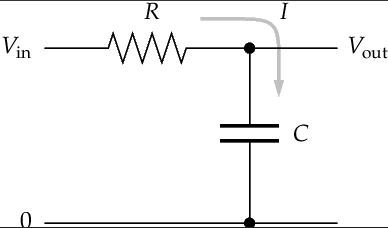


Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.


In [261]:
#Señal de entrada: Onda cuadrada
def vol(t):
    return 1 if int(2*t) % 2 == 0 else -1

In [262]:
#paso del metodo Runge-kutta (4to orden)
def rk4_paso(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

In [263]:
def simulate(rc, t_max=10, h=0.001):
    t_values = np.arange(0, t_max, h)
    vout_values = np.zeros_like(t_values)

    def dvout_dt(t, vout):
        return (vol(t) - vout) / rc

    for i in range(1, len(t_values)):
        vout_values[i] = rk4_paso(dvout_dt, t_values[i-1], vout_values[i-1], h)

    return t_values, vout_values

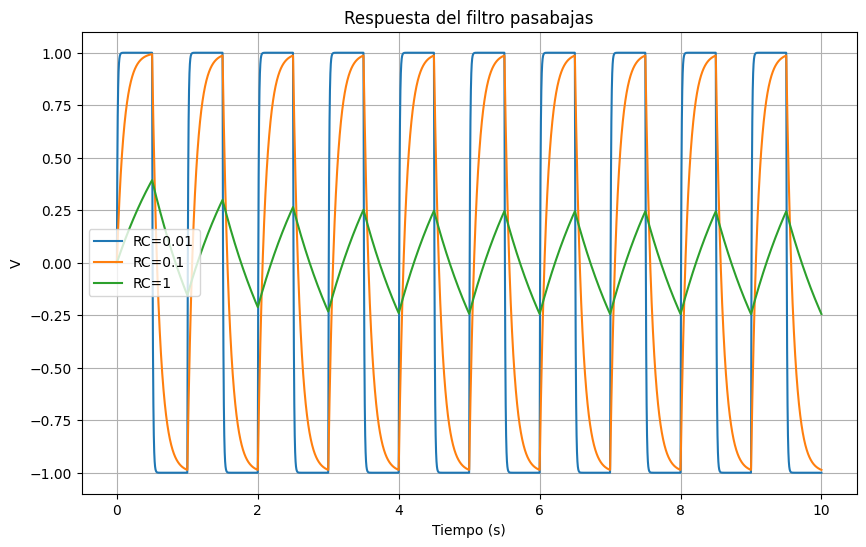

In [264]:
rc_values = [0.01, 0.1, 1]
plt.figure(figsize=(10, 6))

for rc in rc_values:
    t, vout = simulate(rc)
    plt.plot(t, vout, label=f'RC={rc}')

plt.xlabel('Tiempo (s)')
plt.ylabel('V')
plt.title('Respuesta del filtro pasabajas')
plt.legend()
plt.grid()
plt.show()

# 4 Nuevo enunciado


Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con h=0.001 y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

In [265]:
# Parámetros del péndulo
g = 9.81  # gravedad (m/s^2)
l = 1.0   # longitud del péndulo (m)
h = 0.001 # paso de tiempo

In [266]:
# Define la función para la ecuación diferencial del péndulo
def pendulum_ode(t, y):
    u, v = y  # y = [u, u_dot]
    return np.array([v, - (g / l) * np.sin(u)])

In [267]:
# Define la función para resolver la ecuación del péndulo con RK4
def solve_pendulum(u0, t_max=10):
    t_values = np.arange(0, t_max, h)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = [u0, 0]  # condiciones iniciales

    for i in range(1, len(t_values)):
        y_values[i] = rk4_paso(pendulum_ode, t_values[i-1], y_values[i-1], h)

    return t_values, y_values[:, 0]  # Devuelve tiempo y desplazamiento angular

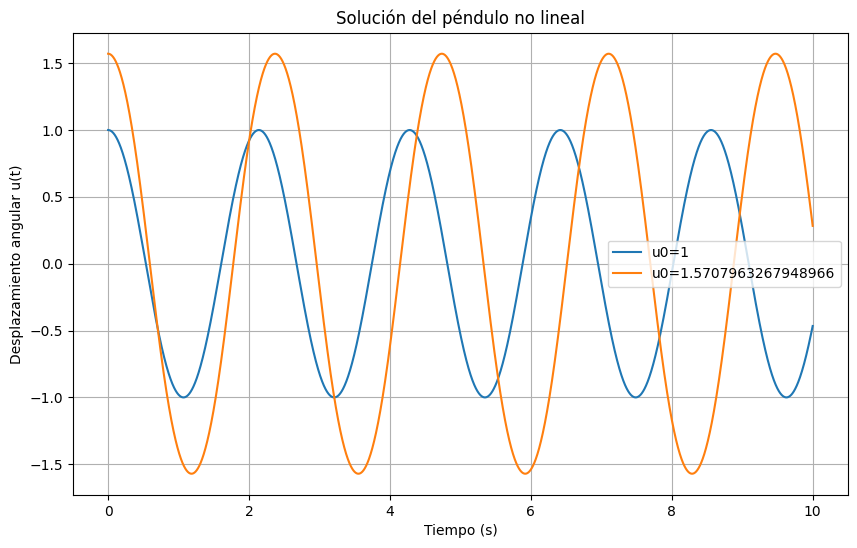

In [268]:
# Resuelve y grafica para diferentes u0
u0_values = [1, np.pi / 2]
plt.figure(figsize=(10, 6))
for u0 in u0_values:
    t, u = solve_pendulum(u0)
    plt.plot(t, u, label=f'u0={u0}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento angular u(t)')
plt.title('Solución del péndulo no lineal')
plt.legend()
plt.grid()
plt.show()

In [269]:
# Comparación de T/T0 con resultado analítico
u0_range = np.linspace(0, np.pi, 100)  # Rango de amplitudes iniciales
T0 = 2 * np.pi * np.sqrt(l / g)  # Período para pequeñas oscilaciones
T_numeric = []
T_analytic = []


In [270]:
for u0 in u0_range:
  # Calcula el período analítico usando ellipk
  T_analytic.append(T0 / np.pi * ellipk(np.sin(u0 / 2) ** 2))

  # Calcula el período numérico encontrando cruces por cero
  t, u = solve_pendulum(u0, t_max=10)
  zero_crossings = np.where(np.diff(np.sign(u)))[0]
  if len(zero_crossings) > 1:
      T_numeric.append(2 * (t[zero_crossings[1]] - t[zero_crossings[0]]))
  else:
      T_numeric.append(np.nan)  # Maneja casos sin cruces por cero

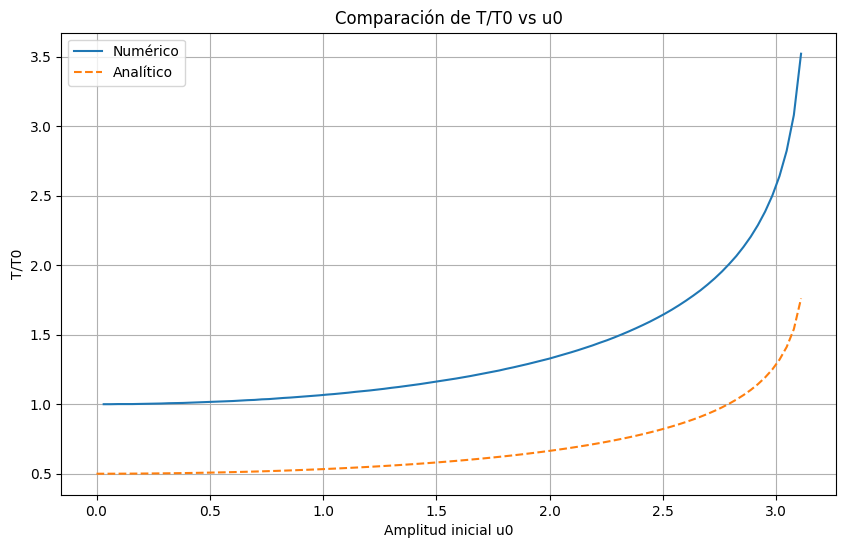

In [271]:
# Grafica la comparación
plt.figure(figsize=(10, 6))
plt.plot(u0_range, np.array(T_numeric) / T0, label='Numérico')
plt.plot(u0_range, np.array(T_analytic) / T0, label='Analítico', linestyle='dashed')
plt.xlabel('Amplitud inicial u0')
plt.ylabel('T/T0')
plt.title('Comparación de T/T0 vs u0')
plt.legend()
plt.grid()
plt.show()

# 5

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


In [272]:
m = 1.0  # Masa
k = 1.0  # Constante del resorte
omega0 = np.sqrt(k / m)  # Frecuencia angular natural

In [273]:
# Función para definir el sistema de ecuaciones
def oscilador(y, t, gamma, F):
    x, v = y
    dvdt = F(t) / m - gamma * v - omega0**2 * x
    return [v, dvdt]

In [274]:
# Condiciones iniciales
x0 = 0.0
v0 = 1.0
y0 = [x0, v0]
# Tiempo de simulación
t = np.linspace(0, 20, 500)

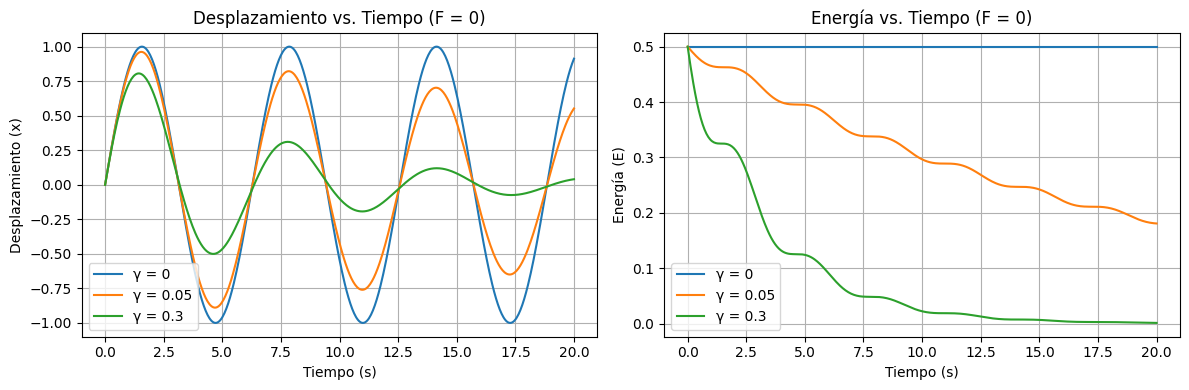

In [275]:
# Caso 1: F = 0, diferentes valores de gamma
gammas = [0, 0.05, 0.3]
plt.figure(figsize=(12, 4))

for gamma in gammas:
    # Resolver la ecuación diferencial
    sol = odeint(oscilador, y0, t, args=(gamma, lambda t: 0))  # F = 0

    # Graficar x(t)
    plt.subplot(1, 2, 1)
    plt.plot(t, sol[:, 0], label=f'γ = {gamma}')

    # Graficar E(t)
    plt.subplot(1, 2, 2)
    E = 0.5 * m * sol[:, 1]**2 + 0.5 * k * sol[:, 0]**2
    plt.plot(t, E, label=f'γ = {gamma}')

plt.subplot(1, 2, 1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (x)')
plt.title('Desplazamiento vs. Tiempo (F = 0)')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (E)')
plt.title('Energía vs. Tiempo (F = 0)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

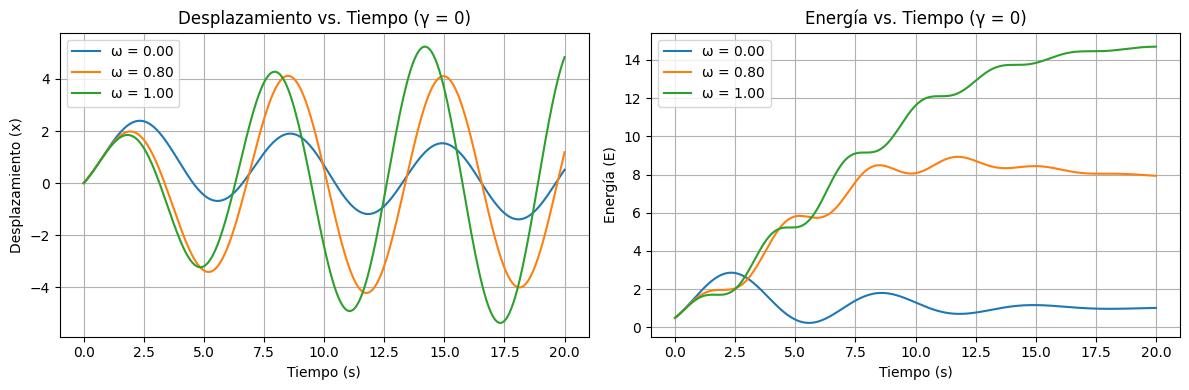

In [276]:
# Caso 2: gamma = 0, F = F0 * cos(omega * t) * exp(-t^2 / T^2)
gamma = 0.0
F0 = 1.0
T = 10.0
omegas = [0, 0.8 * omega0, omega0]
plt.figure(figsize=(12, 4))

for omega in omegas:
    # Definir la fuerza impulsora
    F = lambda t: F0 * np.cos(omega * t) * np.exp(-t**2 / T**2)

    # Resolver la ecuación diferencial
    sol = odeint(oscilador, y0, t, args=(gamma, F))

    # Graficar x(t)
    plt.subplot(1, 2, 1)
    plt.plot(t, sol[:, 0], label=f'ω = {omega:.2f}')

    # Graficar E(t)
    plt.subplot(1, 2, 2)
    E = 0.5 * m * sol[:, 1]**2 + 0.5 * k * sol[:, 0]**2
    plt.plot(t, E, label=f'ω = {omega:.2f}')

plt.subplot(1, 2, 1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (x)')
plt.title('Desplazamiento vs. Tiempo (γ = 0)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (E)')
plt.title('Energía vs. Tiempo (γ = 0)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- α = 0.8 (tasa de reproducción de los conejos)
- β = 0.04 (tasa de depredación de conejos por zorros)
- γ = 0.3 (tasa de mortalidad natural de los zorros)
- δ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


a. Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b. Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c. Compare los resultados de Euler y RK4 mediante:
   * Gráficas de la evolución temporal de ambas poblaciones
   * Diagrama de fase (x vs y)
   * Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

d. Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

e. Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.



In [277]:
def euler(h, t_end, x0, y0):
  t = np.arange(0, t_end, h)
  x = np.zeros(len(t))
  y = np.zeros(len(t))
  x[0] = x0
  y[0] = y0

  for i in range(len(t) - 1):
    x[i + 1] = x[i] + h * (alpha * x[i] - beta * x[i] * y[i])
    y[i + 1] = y[i] + h * (-gamma * y[i] + delta * x[i] * y[i])

  return t, x, y

In [278]:
def rk2(h, t_end, x0, y0):
  """Método de Runge-Kutta de segundo orden."""
  t = np.arange(0, t_end, h)
  x = np.zeros(len(t))
  y = np.zeros(len(t))
  x[0] = x0
  y[0] = y0

  for i in range(len(t) - 1):
    k1x = alpha * x[i] - beta * x[i] * y[i]
    k1y = -gamma * y[i] + delta * x[i] * y[i]
    k2x = alpha * (x[i] + h * k1x) - beta * (x[i] + h * k1x) * (y[i] + h * k1y)
    k2y = -gamma * (y[i] + h * k1y) + delta * (x[i] + h * k1x) * (y[i] + h * k1y)
    x[i + 1] = x[i] + h * (k1x + k2x) / 2
    y[i + 1] = y[i] + h * (k1y + k2y) / 2

  return t, x, y


In [279]:
def rk4(h, t_end, x0, y0):
  """Método de Runge-Kutta de cuarto orden."""
  t = np.arange(0, t_end, h)
  x = np.zeros(len(t))
  y = np.zeros(len(t))
  x[0] = x0
  y[0] = y0

  for i in range(len(t) - 1):
    k1x = alpha * x[i] - beta * x[i] * y[i]
    k1y = -gamma * y[i] + delta * x[i] * y[i]
    k2x = alpha * (x[i] + h * k1x / 2) - beta * (x[i] + h * k1x / 2) * (y[i] + h * k1y / 2)
    k2y = -gamma * (y[i] + h * k1y / 2) + delta * (x[i] + h * k1x / 2) * (y[i] + h * k1y / 2)
    k3x = alpha * (x[i] + h * k2x / 2) - beta * (x[i] + h * k2x / 2) * (y[i] + h * k2y / 2)
    k3y = -gamma * (y[i] + h * k2y / 2) + delta * (x[i] + h * k2x / 2) * (y[i] + h * k2y / 2)
    k4x = alpha * (x[i] + h * k3x) - beta * (x[i] + h * k3x) * (y[i] + h * k3y)
    k4y = -gamma * (y[i] + h * k3y) + delta * (x[i] + h * k3x) * (y[i] + h * k3y)
    x[i + 1] = x[i] + h * (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    y[i + 1] = y[i] + h * (k1y + 2 * k2y + 2 * k3y + k4y) / 6

  return t, x, y


In [280]:
alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01
# Condiciones iniciales
x0 = 50
y0 = 20
# Tiempo de simulación
t_end = 50

In [281]:
h = 0.1
t_euler, x_euler, y_euler = euler(h, t_end, x0, y0)
t_rk2, x_rk2, y_rk2 = rk2(h, t_end, x0, y0)
t_rk4, x_rk4, y_rk4 = rk4(h, t_end, x0, y0)

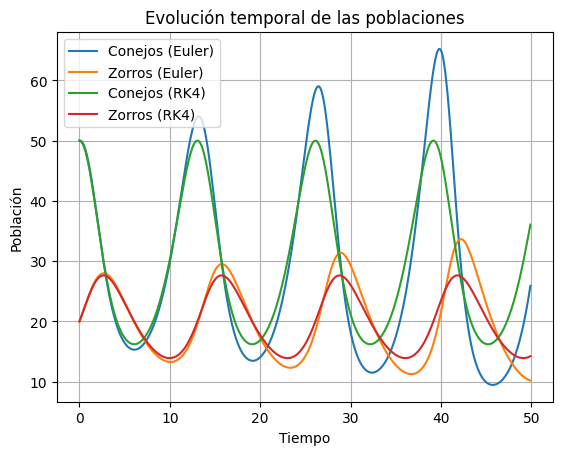

In [282]:
# Evolución temporal
plt.plot(t_euler, x_euler, label='Conejos (Euler)')
plt.plot(t_euler, y_euler, label='Zorros (Euler)')
plt.plot(t_rk4, x_rk4, label='Conejos (RK4)')
plt.plot(t_rk4, y_rk4, label='Zorros (RK4)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Evolución temporal de las poblaciones')
plt.legend()
plt.grid(True)
plt.show()

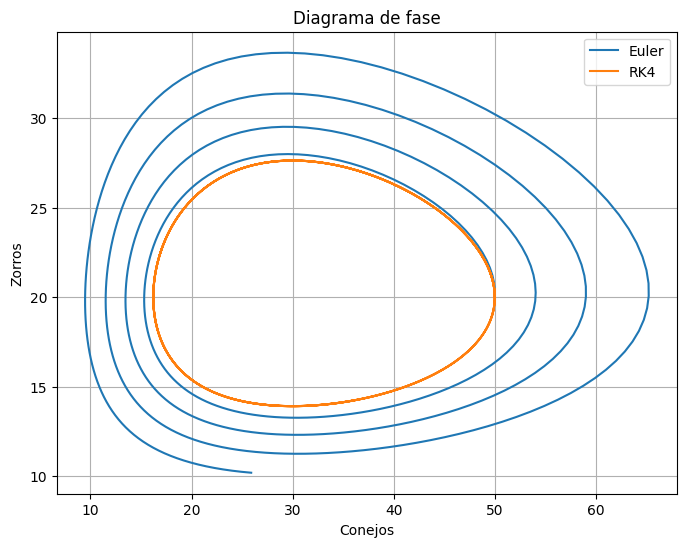

In [283]:
# Diagrama de fase
plt.figure(figsize=(8, 6))
plt.plot(x_euler, y_euler, label='Euler')
plt.plot(x_rk4, y_rk4, label='RK4')
plt.xlabel('Conejos')
plt.ylabel('Zorros')
plt.title('Diagrama de fase')
plt.legend()
plt.grid(True)
plt.show()

In [284]:
error_x = np.abs((x_euler - x_rk4) / x_rk4)
error_y = np.abs((y_euler - y_rk4) / y_rk4)

print(f"Error relativo promedio (Conejos): {np.mean(error_x):.4f}")
print(f"Error relativo promedio (Zorros): {np.mean(error_y):.4f}")

Error relativo promedio (Conejos): 0.1532
Error relativo promedio (Zorros): 0.0817


# 7

En un laboratorio de dinámica, se estudia el comportamiento de dos péndulos acoplados mediante un resorte de constante elástica $k$. Cada péndulo de longitud $L$ y masa $m$ está suspendido de un soporte fijo y oscila en el plano. Se asume que los desplazamientos son pequeños, permitiendo aproximar el movimiento mediante ecuaciones diferenciales lineales.  

Las ecuaciones de movimiento para los ángulos $\theta_1(t)$ y $\theta_2(t)$ de los péndulos con respecto a la vertical están dadas por el sistema:  

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Definiendo el vector de estado $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, escribir el sistema en forma matricial como una ecuación de primer orden:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{A}$ es la matriz de coeficientes del sistema.  

- Expresar el sistema en forma de ecuaciones diferenciales de primer orden.  
- Construir la matriz $\mathbf{A}$ del sistema.  
- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  
- Comparar los resultados obtenidos con los distintos métodos numéricos.  
- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  
- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.
- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  

Para la simulación, se pueden utilizar los valores:  
- $m = 1$ kg,  
- $L = 1$ m,  
- $g = 9.81$ m/s²,  
- $k = 0.5$ N/m,  
- Condiciones iniciales: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.  
- Intervalo de simulación: $t \in [0,10]$ s con paso $\Delta t = 0.01$ s.  


In [285]:
m = 1.0  # kg
L = 1.0  # m
g = 9.81  # m/s²
k = 0.5  # N/m

# Condiciones iniciales
y0 = np.array([0.1, 0.0, 0.0, 0.0])

# Intervalo de simulación
t0, t_end, dt = 0, 10, 0.01
t = np.arange(t0, t_end, dt)

- Construir la matriz $\mathbf{A}$ del sistema.  

In [286]:
# Definición de la matriz A
A = np.array([
    [0, 1, 0, 0],
    [-(g/L + k/m), 0, k/m, 0],
    [0, 0, 0, 1],
    [k/m, 0, -(g/L + k/m), 0]
])

- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  


In [287]:
# Solución numérica
sol = np.zeros((len(t), len(y0)))
sol[0] = y0

for i in range(1, len(t)):
  sol[i] = rk4_paso(sistema_pendulos, t[i-1], sol[i-1], dt)

# Extraer ángulos
theta1 = sol[:, 0]
theta2 = sol[:, 2]

In [288]:
# Función para el sistema
def sistema_pendulos(t, y):
    return A @ y

# Método de Runge-Kutta de 4to orden
def rk4_paso(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

- Comparar los resultados obtenidos con los distintos métodos numéricos.  


In [289]:
# Método de Euler
def euler_paso(f, t, y, h):
    return y + h * f(t, y)

# Método de Runge-Kutta de 2do orden
def rk2_paso(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h, y + k1)
    return y + (k1 + k2) / 2

# Solución numérica con los tres métodos
sol_rk4 = np.zeros((len(t), len(y0)))
sol_euler = np.zeros((len(t), len(y0)))
sol_rk2 = np.zeros((len(t), len(y0)))

sol_rk4[0] = sol_euler[0] = sol_rk2[0] = y0

for i in range(1, len(t)):
    sol_rk4[i] = rk4_paso(sistema_pendulos, t[i-1], sol_rk4[i-1], dt)
    sol_euler[i] = euler_paso(sistema_pendulos, t[i-1], sol_euler[i-1], dt)
    sol_rk2[i] = rk2_paso(sistema_pendulos, t[i-1], sol_rk2[i-1], dt)

# ángulos
theta1_rk4 = sol_rk4[:, 0]
theta2_rk4 = sol_rk4[:, 2]

theta1_euler = sol_euler[:, 0]
theta2_euler = sol_euler[:, 2]

theta1_rk2 = sol_rk2[:, 0]
theta2_rk2 = sol_rk2[:, 2]

Text(0.5, 1.0, 'Comparación de los métodos')

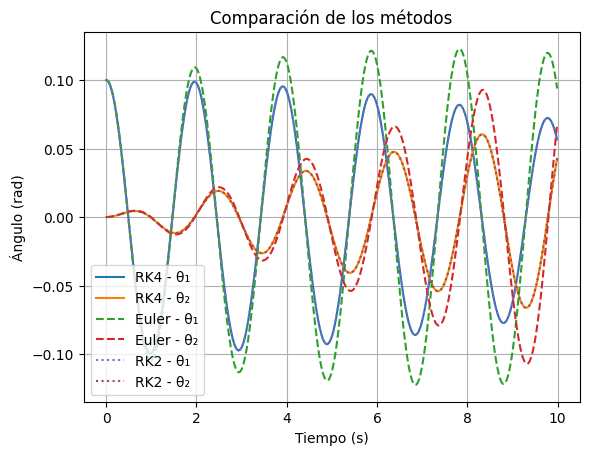

In [290]:
plt.plot(t, theta1_rk4, label='RK4 - θ₁')
plt.plot(t, theta2_rk4, label='RK4 - θ₂')
plt.plot(t, theta1_euler, '--', label='Euler - θ₁')
plt.plot(t, theta2_euler, '--', label='Euler - θ₂')
plt.plot(t, theta1_rk2, ':', label='RK2 - θ₁')
plt.plot(t, theta2_rk2, ':', label='RK2 - θ₂')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.grid(True)
plt.title('Comparación de los métodos')

- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  


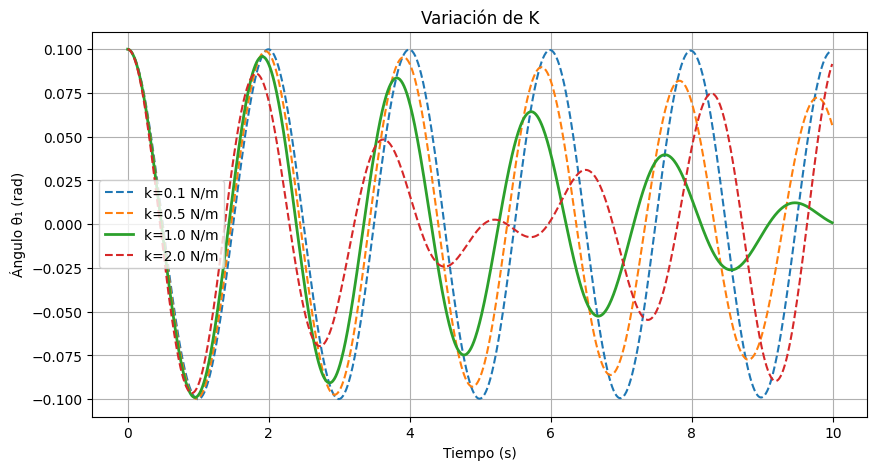

In [291]:
# Análisis de la estabilidad y efecto de k
ks = [0.1, 0.5, 1.0, 2.0]
plt.figure(figsize=(10, 5))
for k in ks:
    A[1][0] = -(g/L + k/m)
    A[1][2] = k/m
    A[3][0] = k/m
    A[3][2] = -(g/L + k/m)
    sol_temp = np.zeros((len(t), len(y0)))
    sol_temp[0] = y0
    for i in range(1, len(t)):
        sol_temp[i] = rk4_paso(sistema_pendulos, t[i-1], sol_temp[i-1], dt)
    if k == 1.0:
        plt.plot(t, sol_temp[:, 0], label=f'k={k} N/m', linewidth=2)
    else:
        plt.plot(t, sol_temp[:, 0], '--', label=f'k={k} N/m')

plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo θ₁ (rad)')
plt.legend()
plt.grid(True)
plt.title('Variación de K')
plt.show()

- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.


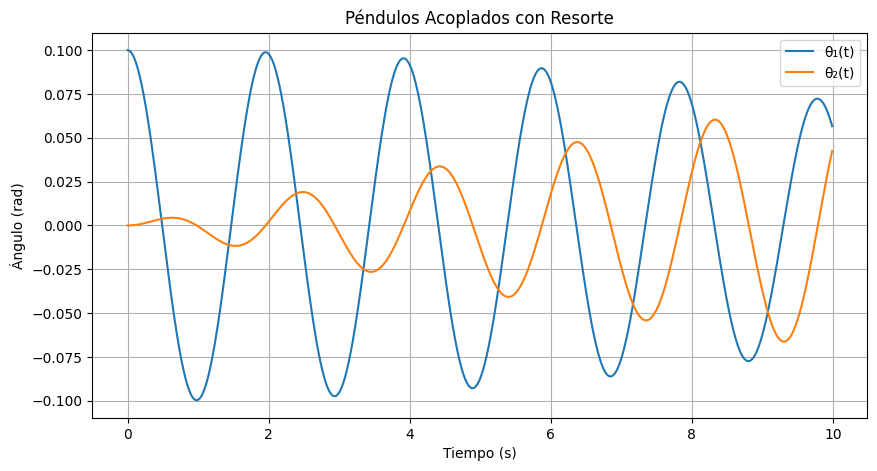

In [292]:
# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(t, theta1, label='θ₁(t)')
plt.plot(t, theta2, label='θ₂(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.grid(True)
plt.title('Péndulos Acoplados con Resorte')
plt.show()

- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  


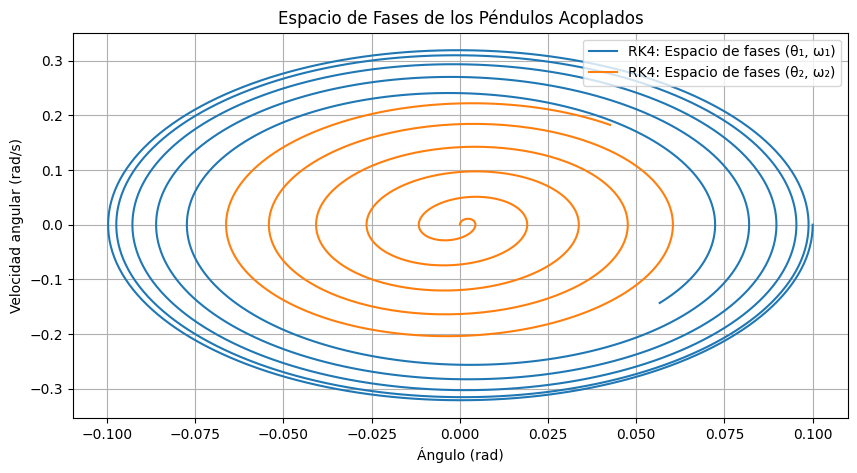

In [293]:
# Graficar espacio de fases
plt.figure(figsize=(10, 5))
plt.plot(theta1_rk4, sol_rk4[:, 1], label='RK4: Espacio de fases (θ₁, ω₁)')
plt.plot(theta2_rk4, sol_rk4[:, 3], label='RK4: Espacio de fases (θ₂, ω₂)')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad angular (rad/s)')
plt.legend()
plt.grid(True)
plt.title('Espacio de Fases de los Péndulos Acoplados')
plt.show()

# 8
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.  

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento de la partícula testigo son:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$  

donde $U$ es el **potencial efectivo** del sistema, definido como:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2).
$$

Aquí, $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$, respectivamente. En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y la constante gravitacional está absorbida en la normalización, la **velocidad angular del sistema** es:  

$$
\omega^2 = 1.
$$  

Existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran.  

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$- Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter

In [294]:
# Parámetro de masa
mu = 0.012277471  # Para el sistema Sol-Tierra

# Coordenadas de los cuerpos principales
x1 = -mu
y1 = 0
x2 = 1 - mu
y2 = 0

# Coordenadas de L4 y L5
x_L4 = 0.5 - mu
y_L4 = np.sqrt(3) / 2
x_L5 = 0.5 - mu
y_L5 = -np.sqrt(3) / 2

In [295]:
def U(x, y):
    """Potencial efectivo."""
    r1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    r2 = np.sqrt((x - x2)**2 + (y - y2)**2)
    return -(1 - mu) / r1 - mu / r2 - 0.5 * (x**2 + y**2)

def dU_dx(x, y):
    """Derivada parcial de U con respecto a x."""
    r1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    r2 = np.sqrt((x - x2)**2 + (y - y2)**2)
    return -(1 - mu) * (x - x1) / r1**3 - mu * (x - x2) / r2**3 - x

def dU_dy(x, y):
    """Derivada parcial de U con respecto a y."""
    r1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    r2 = np.sqrt((x - x2)**2 + (y - y2)**2)
    return -(1 - mu) * (y - y1) / r1**3 - mu * (y - y2) / r2**3 - y

def d2U_dx2(x, y):
    """Segunda derivada parcial de U con respecto a x."""
    r1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    r2 = np.sqrt((x - x2)**2 + (y - y2)**2)
    return -(1 - mu) * (1 / r1**3 - 3 * (x - x1)**2 / r1**5) - mu * (1 / r2**3 - 3 * (x - x2)**2 / r2**5) - 1

def d2U_dy2(x, y):
    """Segunda derivada parcial de U con respecto a y."""
    r1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    r2 = np.sqrt((x - x2)**2 + (y - y2)**2)
    return -(1 - mu) * (1 / r1**3 - 3 * (y - y1)**2 / r1**5) - mu * (1 / r2**3 - 3 * (y - y2)**2 / r2**5) - 1

def d2U_dxdy(x, y):
    """Segunda derivada parcial de U con respecto a x e y."""
    r1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    r2 = np.sqrt((x - x2)**2 + (y - y2)**2)
    return 3 * (1 - mu) * (x - x1) * (y - y1) / r1**5 + 3 * mu * (x - x2) * (y - y2) / r2**5

In [296]:
# --- Matriz A para la estabilidad lineal ---

omega = 1  # Velocidad angular del sistema

# Coeficientes de la matriz A en L4
a = d2U_dx2(x_L4, y_L4)
b = d2U_dxdy(x_L4, y_L4)
c = b  # Por simetría
d = d2U_dy2(x_L4, y_L4)

A_L4 = np.array([[0, 1, 0, 0],
                 [a, 0, b, -2 * omega],
                 [0, 0, 0, 1],
                 [c, 2 * omega, d, 0]])

# --- Análisis de estabilidad ---

# Autovalores de A_L4
eigenvalues_L4 = np.linalg.eigvals(A_L4)

# Imprimir resultados
print("Coordenadas de L4:", x_L4, y_L4)
print("Coordenadas de L5:", x_L5, y_L5)
print("Autovalores de A_L4:", eigenvalues_L4)

Coordenadas de L4: 0.487722529 0.8660254037844386
Coordenadas de L5: 0.487722529 -0.8660254037844386
Autovalores de A_L4: [ 4.02455846e-16+2.31473467j  4.02455846e-16-2.31473467j
 -5.98328167e-01+0.j          5.98328167e-01+0.j        ]


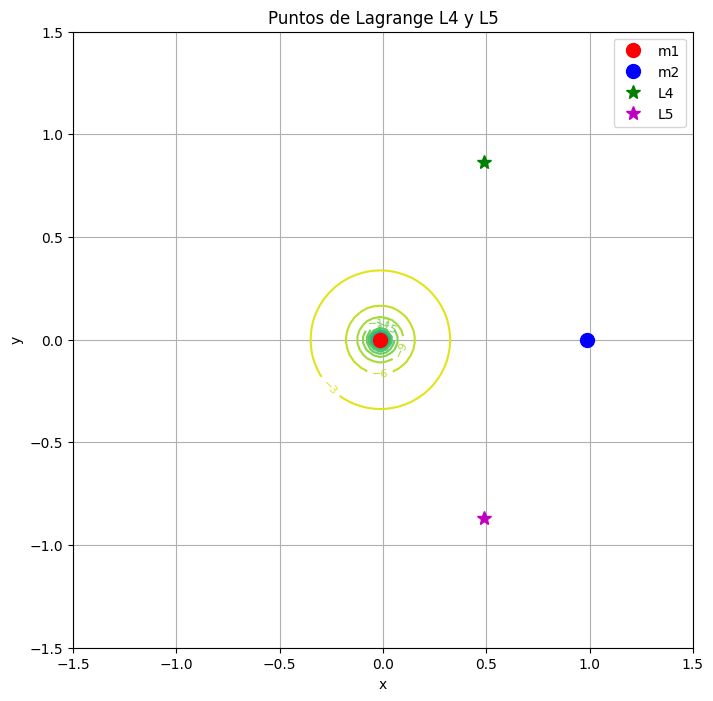

In [297]:
# Rango de coordenadas
x_range = np.linspace(-1.5, 1.5, 100)
y_range = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_range, y_range)

# Potencial efectivo en el plano xy
Z = U(X, Y)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 8))

# Contornos del potencial efectivo
contour = ax.contour(X, Y, Z, levels=20, cmap='viridis')
ax.clabel(contour, inline=1, fontsize=8)

# Puntos de Lagrange
ax.plot(x1, y1, 'ro', markersize=10, label='m1')
ax.plot(x2, y2, 'bo', markersize=10, label='m2')
ax.plot(x_L4, y_L4, 'g*', markersize=10, label='L4')
ax.plot(x_L5, y_L5, 'm*', markersize=10, label='L5')

# Ajustes de la gráfica
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Puntos de Lagrange L4 y L5')
ax.legend()
ax.grid(True)
plt.show()

# 9

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


En general, se espera que el sistema sea más estable para valores pequeños de κ y menos estable para valores grandes de κ.

In [299]:
# Definimos la ecuación diferencial
def sistema_galactico(t, y):
    return A @ y

Text(0.5, 1.0, 'Densidad de perturbaciones en el disco galáctico')

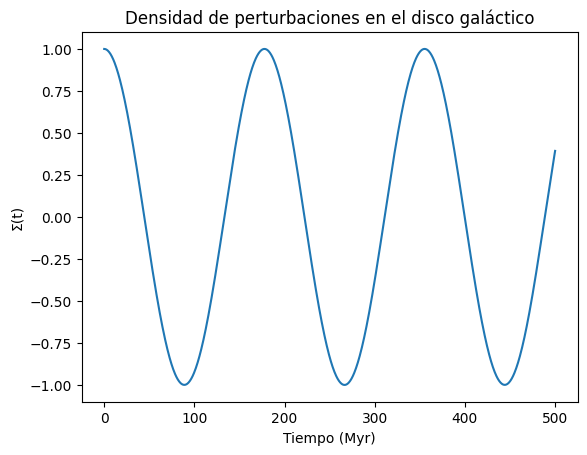

In [300]:
# Parámetros iniciales arbitrarios
V0 = 200  # km/s
r = 8000  # pc
Omega = V0 / r  # frecuencia angular
kappa = np.sqrt(2) * Omega  # frecuencia de epicíclo

# Definimos la matriz A del sistema
A = np.array([
    [0, 1],
    [-kappa**2, 0]
])

# Definimos la ecuación diferencial
def sistema_galactico(t, y):
    return A @ y

# Condiciones iniciales
Sigma0 = 1.0  # densidad inicial arbitraria
vSigma0 = 0.0  # perturbación inicial sin velocidad

# Tiempo de integración
t = (0, 500)  # en millones de años
time_eval = np.linspace(*t, 1000)

# Resolver la ecuación diferencial
solution = solve_ivp(jeans_eq, t, [Sigma0, vSigma0], t_eval=time_eval)

# Graficar la evolución temporal de Sigma(t)
plt.plot(solution.t, solution.y[0])
plt.xlabel('Tiempo (Myr)')
plt.ylabel('Σ(t)')
plt.title('Densidad de perturbaciones en el disco galáctico')

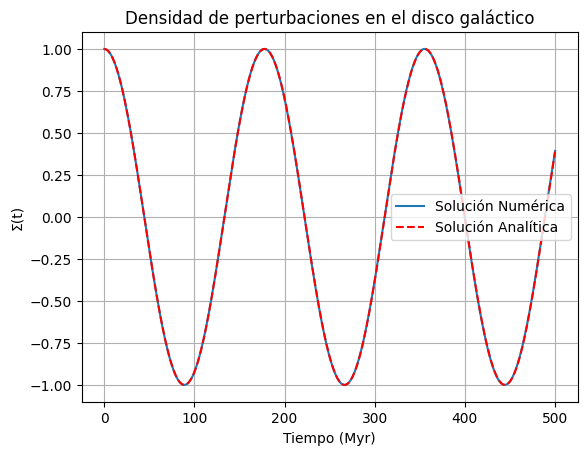

In [301]:
# Comparación con la solución analítica
analytical_solution = Sigma0 * np.cos(kappa * time_eval)

plt.plot(solution.t, solution.y[0], label='Solución Numérica')
plt.plot(time_eval, analytical_solution, '--', label='Solución Analítica', color='red')
plt.xlabel('Tiempo (Myr)')
plt.ylabel('Σ(t)')
plt.title('Densidad de perturbaciones en el disco galáctico')
plt.legend()
plt.grid(True)

In [302]:
# Calcular la matriz del sistema
A = np.array([[0, 1], [-kappa**2, 0]])
eigenvalues, vectors = eig(A)

print("Valores propios del sistema matricial:", eigenvalues)

# Interpretación de la estabilidad
if np.all(np.real(eigenvalues) < 0):
  print("Los valores propios tienen parte real negativa, el sistema es estable.")
elif np.any(np.real(eigenvalues) > 0):
  print("Al menos un valor propio tiene parte real positiva, el sistema es inestable.")
else:
  print("los valores propios son puramente imaginarios, el sistema es marginalmente estable (oscilaciones).")

Valores propios del sistema matricial: [0.+0.03535534j 0.-0.03535534j]
los valores propios son puramente imaginarios, el sistema es marginalmente estable (oscilaciones).


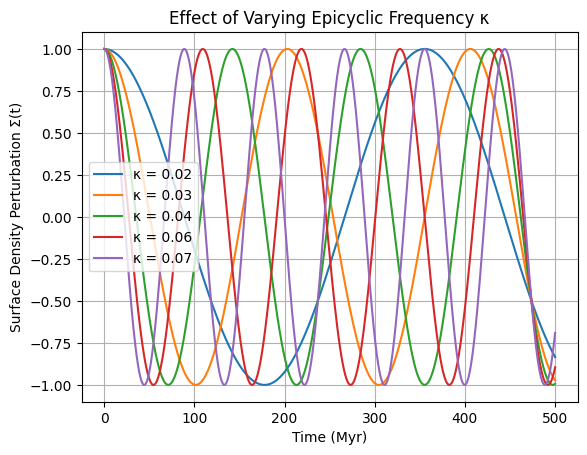

In [303]:
# Análisis de cómo cambia la estabilidad al variar kappa
kappa_values = np.linspace(0.5 * kappa, 2 * kappa, 5)


for k in kappa_values:
    solution_varied = solve_ivp(lambda t, y: [y[1], -k**2 * y[0]], t, [Sigma0, vSigma0], t_eval=time_eval)
    plt.plot(solution_varied.t, solution_varied.y[0], label=f'κ = {k:.2f}')

plt.xlabel('Time (Myr)')
plt.ylabel('Surface Density Perturbation Σ(t)')
plt.title('Effect of Varying Epicyclic Frequency κ')
plt.legend()
plt.grid(True)